In [2]:
# Import libraries

from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [6]:
# import the data

NVR = pdr.get_data_yahoo('NVR',start='2017-01-01',end='2021-12-31')
NVR

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,1650.000000,1665.000000,1631.780029,1649.989990,1649.989990,37400
2017-01-04,1654.000000,1686.520020,1645.030029,1678.770020,1678.770020,22500
2017-01-05,1676.199951,1690.829956,1671.510010,1689.400024,1689.400024,24200
2017-01-06,1684.010010,1697.479980,1675.010010,1678.099976,1678.099976,23400
2017-01-09,1680.800049,1689.000000,1666.550049,1681.500000,1681.500000,17100
...,...,...,...,...,...,...
2021-12-23,5826.669922,5847.799805,5779.890137,5784.629883,5784.629883,7400
2021-12-27,5817.000000,5830.970215,5763.479980,5820.069824,5820.069824,12600
2021-12-28,5820.500000,5893.500000,5820.500000,5869.470215,5869.470215,7900


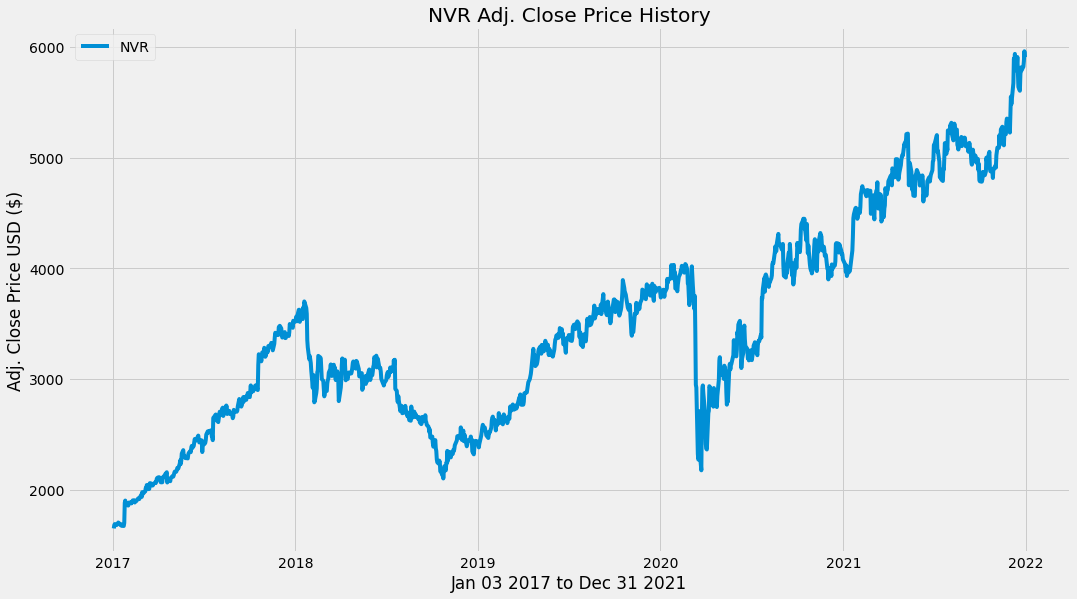

In [88]:
# visualizing the data
plt.figure(figsize=(16,9))
plt.plot(NVR['Adj Close'], label = 'NVR')
plt.title('NVR Adj. Close Price History')
plt.xlabel('Jan 03 2017 to Dec 31 2021')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [44]:
# Creating the simple moving average of 10 days
SMA10 = pd.DataFrame()
SMA10['Adj Close'] = NVR['Adj Close'].rolling(window=10).mean()
SMA10

,Adj Close
Date,
2017-01-03,NaN
2017-01-04,NaN
2017-01-05,NaN
2017-01-06,NaN
2017-01-09,NaN
...,...
2021-12-23,5780.596973
2021-12-27,5769.031934
2021-12-28,5777.388965


In [45]:
# Creating another simple moving average for 50 days
SMA50 = pd.DataFrame()
SMA50['Adj Close'] = NVR['Adj Close'].rolling(window=50).mean()
SMA50

,Adj Close
Date,
2017-01-03,NaN
2017-01-04,NaN
2017-01-05,NaN
2017-01-06,NaN
2017-01-09,NaN
...,...
2021-12-23,5298.096992
2021-12-27,5314.530986
2021-12-28,5332.589795


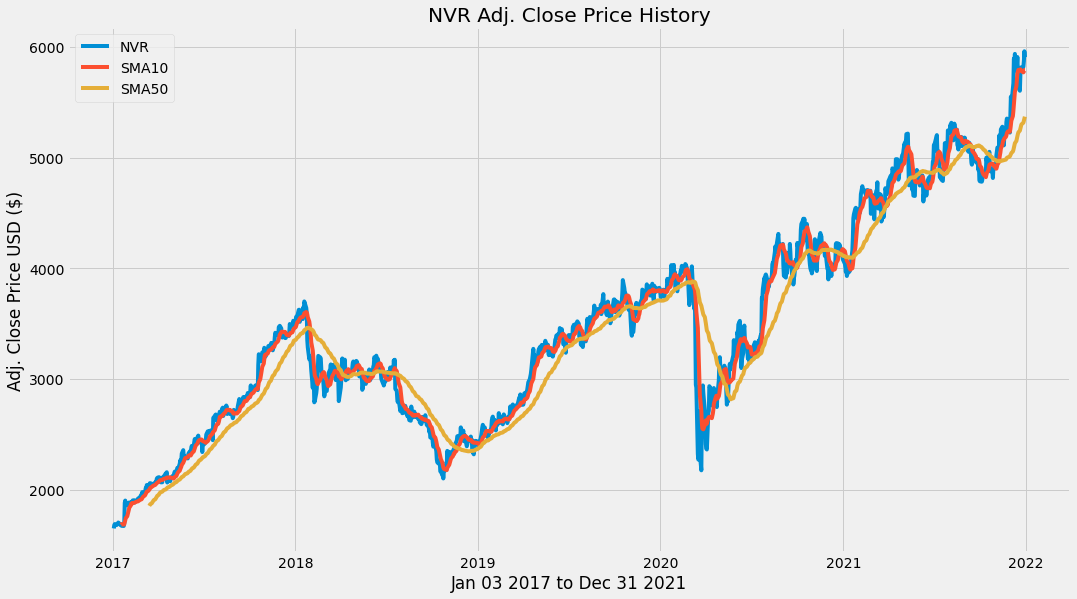

In [87]:
# visualizing the data
plt.figure(figsize=(16,9))
plt.plot(NVR['Adj Close'], label = 'NVR')
plt.plot(SMA10['Adj Close'], label = 'SMA10')
plt.plot(SMA50['Adj Close'], label = 'SMA50')
plt.title('NVR Adj. Close Price History')
plt.xlabel('Jan 03 2017 to Dec 31 2021')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [47]:
# Creating a new df to store the sma data
data = pd.DataFrame()
data['NVR'] = NVR['Adj Close']
data['SMA10']=SMA10['Adj Close']
data['SMA50']=SMA50['Adj Close']
data

,NVR,SMA10,SMA50
Date,,,
2017-01-03,1649.989990,NaN,NaN
2017-01-04,1678.770020,NaN,NaN
2017-01-05,1689.400024,NaN,NaN
2017-01-06,1678.099976,NaN,NaN
2017-01-09,1681.500000,NaN,NaN
...,...,...,...
2021-12-23,5784.629883,5780.596973,5298.096992
2021-12-27,5820.069824,5769.031934,5314.530986
2021-12-28,5869.470215,5777.388965,5332.589795


In [48]:
# Creating a function to signal when to buy and sell the stock / asset
def buy_sell(data):
    sigPriceBuy = []
    sigPriceSell = []
    flag = -1
    
    for i in range(len(data)):
        if data['SMA10'][i]>data['SMA50'][i]:
            if flag != 1:
                sigPriceBuy.append(data['NVR'][i])
                sigPriceSell.append(np.nan)
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif data['SMA10'][i]<data['SMA50'][i]:
            if flag != 0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data['NVR'][i])
                flag = 0
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
    return (sigPriceBuy, sigPriceSell)
    

In [53]:
# Storing the buy and sell data into a variable
buysell = buy_sell(data)
data['Buy_Signal'] = buysell[0]
data['Sell_Signal'] = buysell[1]

In [54]:
#showing the data
data

,NVR,SMA10,SMA50,Buy_Signal,Sell_Signal
Date,,,,,
2017-01-03,1649.989990,NaN,NaN,NaN,NaN
2017-01-04,1678.770020,NaN,NaN,NaN,NaN
2017-01-05,1689.400024,NaN,NaN,NaN,NaN
2017-01-06,1678.099976,NaN,NaN,NaN,NaN
2017-01-09,1681.500000,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2021-12-23,5784.629883,5780.596973,5298.096992,NaN,NaN
2021-12-27,5820.069824,5769.031934,5314.530986,NaN,NaN
2021-12-28,5869.470215,5777.388965,5332.589795,NaN,NaN


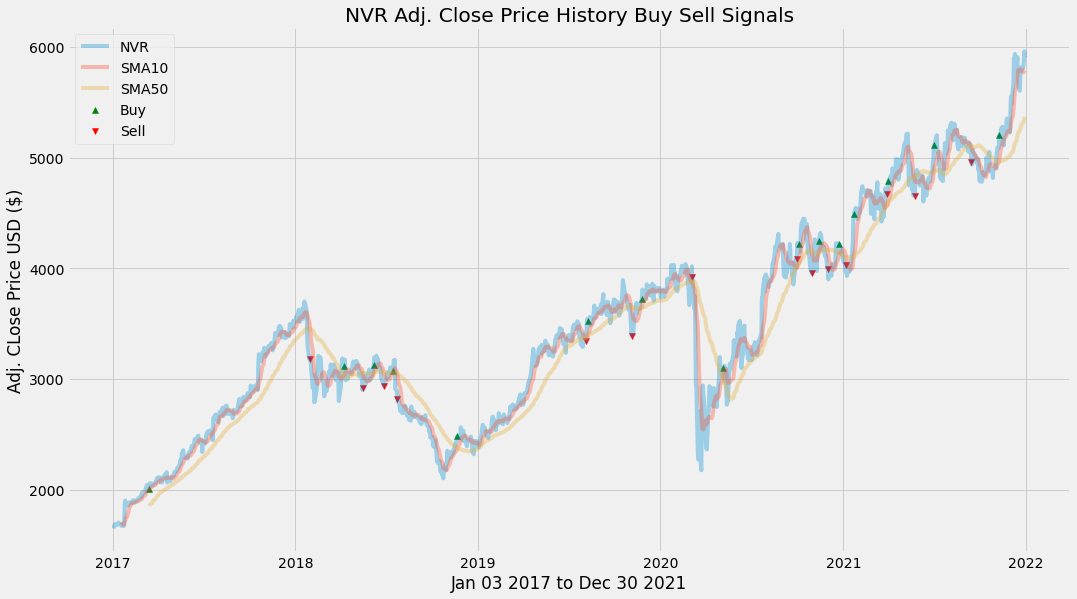

In [86]:
# visualizing the data and the buy/sell strategy
plt.figure(figsize=(16,9))
plt.plot(data['NVR'],label='NVR', alpha=0.35)
plt.plot(data['SMA10'],label='SMA10', alpha=0.35)
plt.plot(data['SMA50'],label='SMA50', alpha=0.35)
plt.scatter(data.index, data['Buy_Signal'], label='Buy',marker='^',color='green')
plt.scatter(data.index,data['Sell_Signal'],label='Sell',marker='v',color='red')
plt.title('NVR Adj. Close Price History Buy Sell Signals')
plt.xlabel('Jan 03 2017 to Dec 30 2021')
plt.ylabel('Adj. CLose Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [56]:
data

,NVR,SMA10,SMA50,Buy_Signal,Sell_Signal
Date,,,,,
2017-01-03,1649.989990,NaN,NaN,NaN,NaN
2017-01-04,1678.770020,NaN,NaN,NaN,NaN
2017-01-05,1689.400024,NaN,NaN,NaN,NaN
2017-01-06,1678.099976,NaN,NaN,NaN,NaN
2017-01-09,1681.500000,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2021-12-23,5784.629883,5780.596973,5298.096992,NaN,NaN
2021-12-27,5820.069824,5769.031934,5314.530986,NaN,NaN
2021-12-28,5869.470215,5777.388965,5332.589795,NaN,NaN


In [60]:
buy_days = data[~data['Buy_Signal'].isnull()]
buy_days

In [61]:
sell_days = data[~data['Sell_Signal'].isnull()]
sell_days

In [66]:
bs_df = pd.concat([buy_days,sell_days]).sort_index()
bs_df

,NVR,SMA10,SMA50,Buy_Signal,Sell_Signal
Date,,,,,
2017-03-15,2007.000000,1998.172998,1853.802393,2007.000000,NaN
2018-01-31,3178.169922,3439.067969,3455.165786,NaN,3178.169922
2018-04-09,3116.439941,3033.664990,3032.268589,3116.439941,NaN
2018-05-16,2917.000000,3048.964038,3057.535005,NaN,2917.000000
2018-06-07,3125.290039,3050.736011,3049.674614,3125.290039,NaN
2018-06-27,2940.919922,3054.726953,3062.635200,NaN,2940.919922
2018-07-16,3070.879883,3059.327979,3049.908594,3070.879883,NaN
2018-07-24,2817.530029,3041.006982,3042.631787,NaN,2817.530029
2018-11-21,2482.540039,2376.635010,2375.749189,2482.540039,NaN


TypeError: scatter() got multiple values for argument 'x'

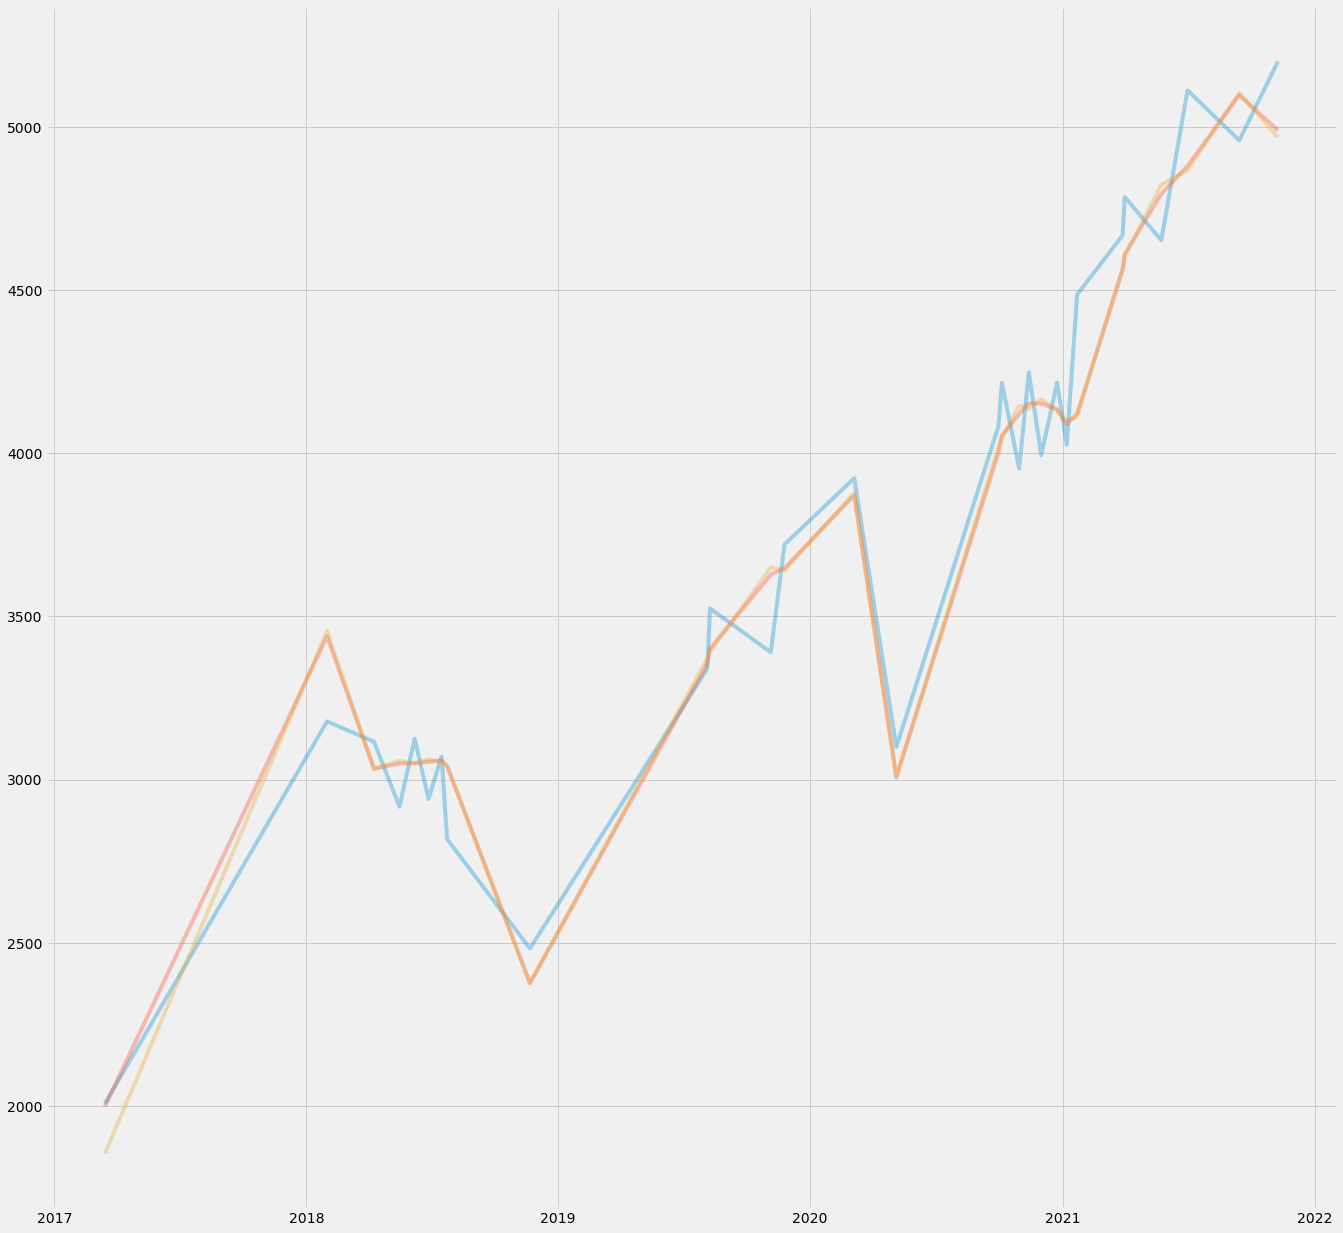

In [91]:
# visualizing the data and the buy/sell df
plt.figure(figsize=(20.6,20.6))
plt.plot(bs_df['NVR'],label='NVR', alpha=0.35)
plt.plot(bs_df['SMA10'],label='SMA10', alpha=0.35)
plt.plot(bs_df['SMA50'],label='SMA50', alpha=0.35)
plt.scatter(bs_df.index, bs_df['Buy_Signal'], label='Buy',marker='^',color='green',=bs_df['Buy_Signal'])
plt.scatter(bs_df.index,bs_df['Sell_Signal'],label='Sell',marker='v',color='red')
plt.title('NVR Adj. Close Price History Buy Sell Signals')
plt.xlabel('Jan 03 2017 to Dec 30 2021')
plt.ylabel('Adj. CLose Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [ ]:
amt = 50000
bp = amt/NVR
pft = 0
for i,r in bs_df, 
    bp = amt/NVR
    if bs_df[r].Sell_Signal is NaN:
        cp=bp*bs_df[r].Buy_Signal
        pft = pft + cp
    else:
        sp=bp*bs_df[r].Sell_Signal
        pft = pft - sp

In [110]:
for i,r in bs_df.iterrows():
    print(i)
    print('OOOOOOOO')
    print(r)

2017-03-15 00:00:00
OOOOOOOO
NVR            2007.000000
SMA10          1998.172998
SMA50          1853.802393
Buy_Signal     2007.000000
Sell_Signal            NaN
Name: 2017-03-15 00:00:00, dtype: float64
2018-01-31 00:00:00
OOOOOOOO
NVR            3178.169922
SMA10          3439.067969
SMA50          3455.165786
Buy_Signal             NaN
Sell_Signal    3178.169922
Name: 2018-01-31 00:00:00, dtype: float64
2018-04-09 00:00:00
OOOOOOOO
NVR            3116.439941
SMA10          3033.664990
SMA50          3032.268589
Buy_Signal     3116.439941
Sell_Signal            NaN
Name: 2018-04-09 00:00:00, dtype: float64
2018-05-16 00:00:00
OOOOOOOO
NVR            2917.000000
SMA10          3048.964038
SMA50          3057.535005
Buy_Signal             NaN
Sell_Signal    2917.000000
Name: 2018-05-16 00:00:00, dtype: float64
2018-06-07 00:00:00
OOOOOOOO
NVR            3125.290039
SMA10          3050.736011
SMA50          3049.674614
Buy_Signal     3125.290039
Sell_Signal            NaN
Name: 2018-0